In [2]:
import numpy as np
from copy import deepcopy
import matplotlib.pyplot as plt
import random

In [3]:
def feed_forward(inputs, outputs, weights):
    pre_hidden = np.dot(inputs, weights[0]) + weights[1]
    hidden = np.maximum(0, pre_hidden)
    pred_out = np.dot(hidden, weights[2]) + weights[3]
    mean_squared_error = np.mean(np.square(pred_out - outputs))
    return mean_squared_error


def update_weights(inputs, outputs, weights, lr):
    original_weights = deepcopy(weights)
    temp_weights = deepcopy(weights)
    updated_weights = deepcopy(weights)
    original_loss = feed_forward(inputs, outputs, original_weights)

    for i, layer in enumerate(original_weights):
        for index, _ in np.ndenumerate(layer):
            temp_weights = deepcopy(weights)
            temp_weights[i][index] += 0.0001
            _loss_plus = feed_forward(inputs, outputs, temp_weights)
            grad = (_loss_plus - original_loss) / 0.0001
            updated_weights[i][index] -= grad * lr
    return updated_weights, original_loss

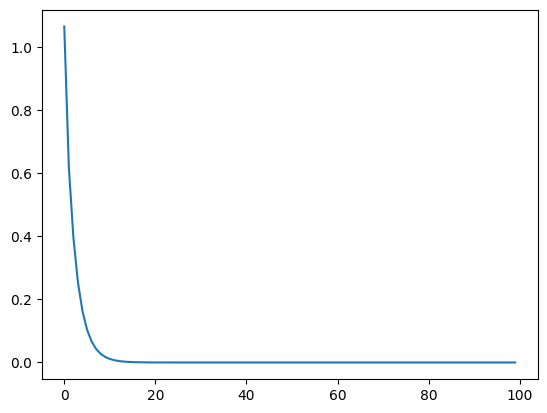

In [4]:
if __name__ == "__main__":
    x = np.array([[1, 1]])
    y = np.array([[0]])
    w = [np.random.uniform(-1, 1, (2, 3)),
         np.random.uniform(-1, 1, (1, 3)),
         np.random.uniform(-1, 1, (3, 1)),
         np.random.uniform(-1, 1, (1, 1))
        ]
    
    losses = []
    for epoch in range(100):
        w, loss = update_weights(x, y, w, 0.1)
        losses.append(loss)
    
    plt.plot(losses)
    plt.show()
    